# Pymaceuticals Inc.
---
Pharmaceuticals Summary

In this exercise we were asked to merge two sets of pharmaceutical data and then clean, process, and visualize the data to make an analysis.  The research measured the effect of ten different treatments on tumor size in mice.  After cleaning and visualizing the data, it became clear that there were certain treatments that were more effective than others.  The four most effective Treatments, given a cursory statistical analysis using the aggregate function, were Capomulin, Ceftamin, Infubinol, and Ramicane.

There were no outliers for Capomulin, Ceftamin, or Ramicane in the data.  For Infubinol there was one outlier for the tumor volume (36.32 mm3).  After creating the box plot of the data, Ramicane and Capomulin both appear to be effective treatments for reducing tumor volume.  Capomulin, due to its lower IQR, looks to be more consistent than the larger range shown in Ramicane. 

For mouse L509 treated with Capomulin, there is pretty clear evidence that optimal shrinkage of the tumor occurs around 35 days after treatment begins.  It would probably be prudent to remove the tumor at this time if possible.  It looks to grow again past 35 days, but that could be the tumor adapting to the treatment.  

For the last pieces of the Module Challenge, the scatterplot shows that the heavier the mouse, the larger the tumor.  This is confirmed with the correlation coefficient of .84, meaning that there is a high correlation between the two.   The R2 value shows that the linear regression fits fairly well and confirms what the data shows.  

The data shows that Ramicane and Capomulin are effective in reducing tumor sizes in mice. Further analysis is needed to confirm, but one suggestion would be to see how the data plays out in the two genders and see if one or more of the drugs is more impactful in men than women or vice versa.  


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combinedDF = pd.merge(mouse_metadata, study_results, how='left', on="Mouse ID")

# Display the data table for preview
combinedDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouseCount = len(combinedDF["Mouse ID"].unique())
print(mouseCount)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = combinedDF.loc[combinedDF.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicateMice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseID = combinedDF.loc[combinedDF["Mouse ID"] == "g989", :]
duplicateMouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedDF = combinedDF[combinedDF["Mouse ID"] != "g989"]
cleanedDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleanedMice = cleanedDF["Mouse ID"].value_counts()
cleanedMiceCount = len(cleanedMice)
cleanedMiceCount


248

In [8]:
print(cleanedDF)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sumStats = cleanedDF.describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
sumStatsDrug = cleanedDF.groupby("Drug Regimen").describe()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meanStatsDrug = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medStatsDrug = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varStatsDrug = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdevStatsDrug = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
semStatsDrug = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summaryDF = pd.DataFrame({
    "Mean" : meanStatsDrug,
    "Median" : medStatsDrug,
    "Variance" : varStatsDrug,
    "Standard Deviation" : stdevStatsDrug,
    "Stadard Error of Mean" : semStatsDrug
    })

print(summaryDF)

                   Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.320930  50.446266  43.852013            6.622085   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Stadard Error of Mean  
Drug Regimen                         
Capomulin                  0.329346  
Ceftamin                   0.469821  
Infubinol          

In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
fancySummaryDF = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean = "mean",
    Median = "median",
    Variance = "var",
    Standard_Deviation = "std",
    Standard_Error_of_Mean = "sem"
)

# Using the aggregation method, produce the same summary statistics in a single line
aggSummaryDF = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
print(aggSummaryDF)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

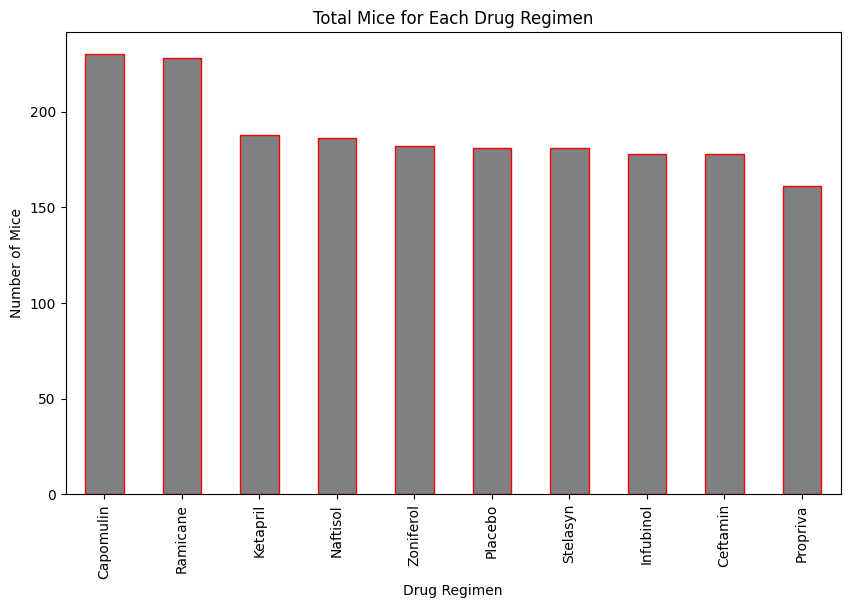

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
miceCount = combinedDF["Drug Regimen"].value_counts()
plt.figure(figsize = (10, 6))
barPlot = miceCount.plot.bar(facecolor = 'grey', edgecolor = 'r')
plt.title("Total Mice for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.show()

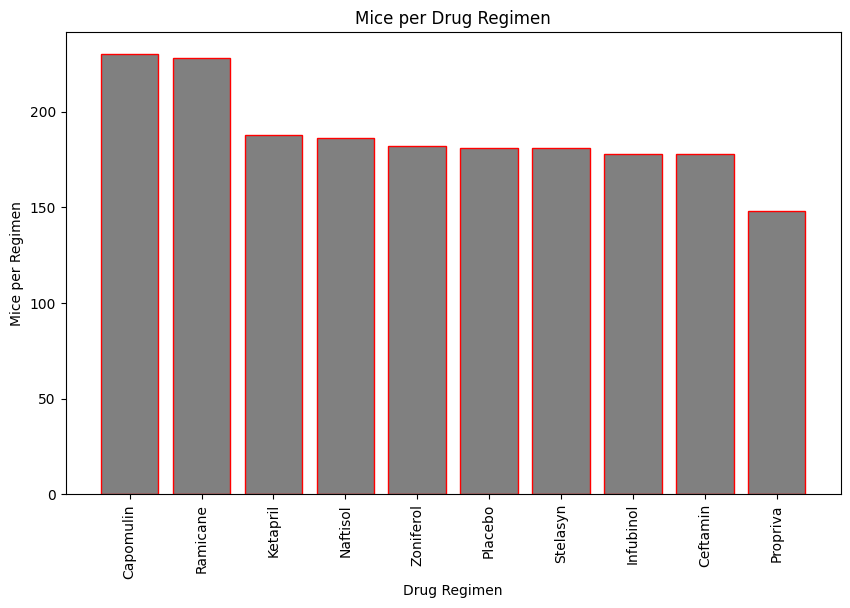

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
miceCounts = cleanedDF["Drug Regimen"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(miceCounts.index, miceCounts.values, facecolor = "grey", edgecolor= "r")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice per Regimen")
plt.title("Mice per Drug Regimen")
plt.xticks(rotation = 90)
plt.show()



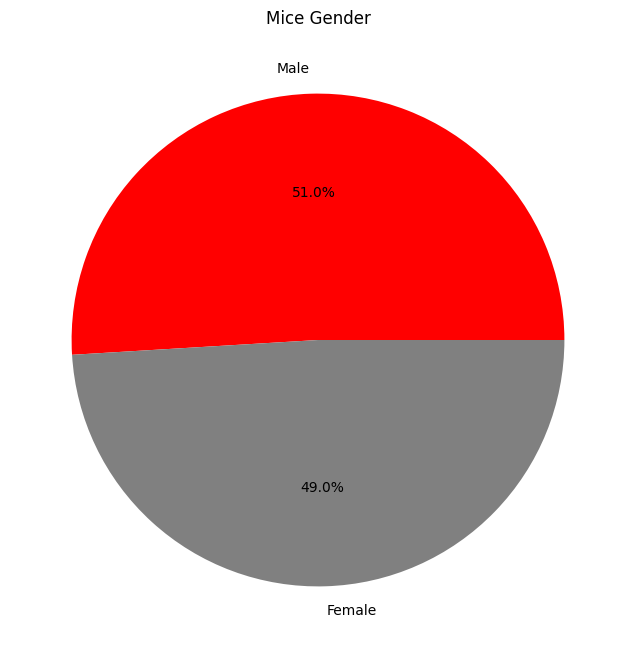

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderMice = cleanedDF["Sex"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genderMice, labels=genderMice.index, autopct = "%.1f%%", startangle = 360, colors=['r','grey'])
plt.title("Mice Gender")
plt.show()


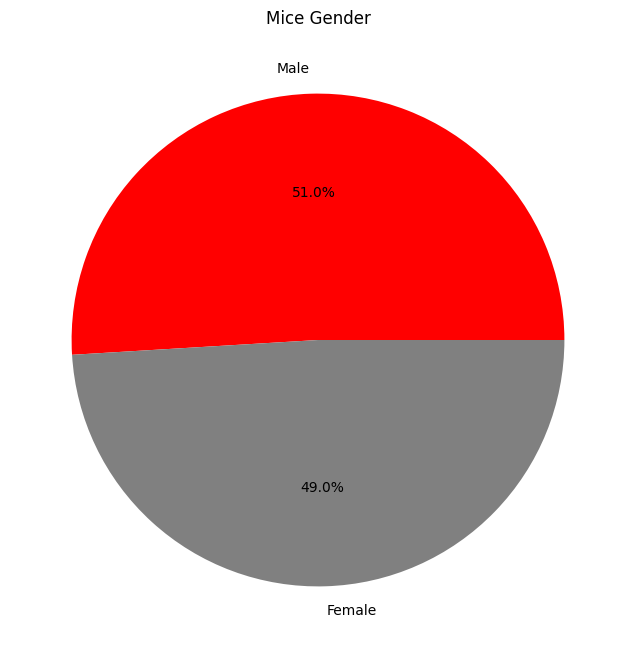

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize = (8, 8))
plt.pie(genderMice, labels = genderMice.index, autopct="%1.1f%%", startangle=360, colors=["r", "grey"])
plt.title("Mice Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
finalTumorVolDF = cleanedDF[cleanedDF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]


# Group by Mouse ID and get the last recorded tumor volume for each mouse
finalTumorVol = finalTumorVolDF.groupby("Mouse ID").agg(finalVolume=("Tumor Volume (mm3)", "last")).reset_index()


# Merge the final tumor volume information with drug regimen data
finalTumorVolDF = pd.merge(finalTumorVol, cleanedDF[["Mouse ID", "Drug Regimen"]].drop_duplicates(), on="Mouse ID")

In [18]:
# find potential outliers with a 'for' loop
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []


# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatmentData = finalTumorVolDF[finalTumorVolDF["Drug Regimen"] == treatment]["finalVolume"]
    tumorVol.append(treatmentData)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatmentData.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Find outliers
    outliers = treatmentData[(treatmentData < lower_bound) | (treatmentData > upper_bound)]
    
        
    #add a subset
    subset = cleanedDF[cleanedDF["Drug Regimen"] == "Capomulin"]

    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o}"
        print(output)


    


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None


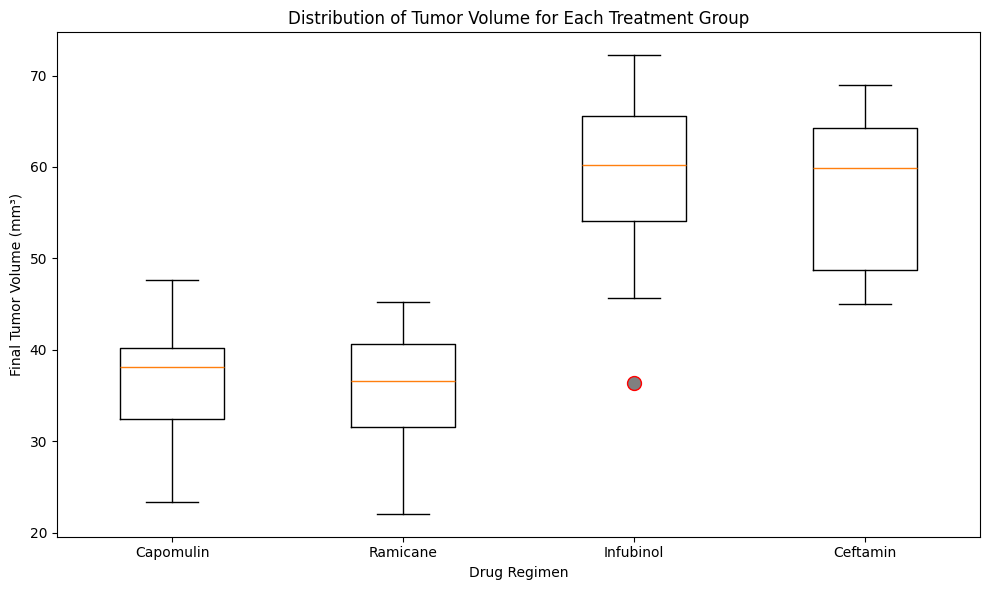

In [20]:
import matplotlib.pyplot as plt

# Define flier prop before using
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10, markeredgecolor = 'r')  

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

# Create the box plot with corrected parameters
plt.boxplot(
    [finalTumorVolDF[finalTumorVolDF["Drug Regimen"] == treatment]["finalVolume"] for treatment in treatments],
    tick_labels=treatments, flierprops=flierprops)
# Set the labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm³)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

# Improve layout and display the plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

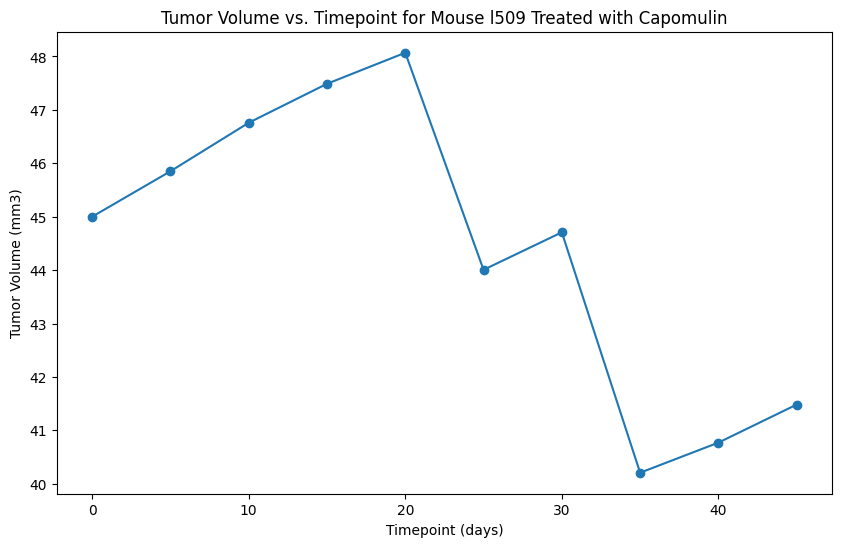

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singleMouseData = cleanedDF[(cleanedDF["Drug Regimen"] == "Capomulin") & (cleanedDF["Mouse ID"] == "l509")]
plt.figure(figsize=(10, 6))
plt.plot(singleMouseData["Timepoint"], singleMouseData["Tumor Volume (mm3)"], marker='o')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoint for Mouse l509 Treated with Capomulin")
plt.show()

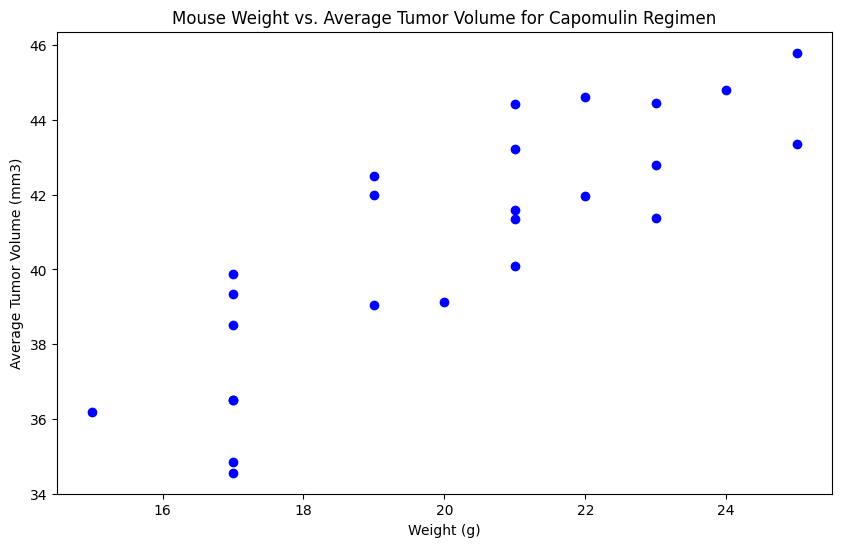

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinData = cleanedDF[cleanedDF["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse treated with Capomulin
avgTumorVol = capomulinData.groupby("Mouse ID").agg(avgTumorVol=("Tumor Volume (mm3)", "mean")).reset_index()

# Merge the average tumor volume information with mouse weight data
capomulinData = pd.merge(avgTumorVol, capomulinData[['Mouse ID', 'Weight (g)']].drop_duplicates(), on="Mouse ID")

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulinData["Weight (g)"], capomulinData["avgTumorVol"], marker='o', color='blue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

The correlation between Mouse Weight and Tumor Volume is: 0.84
The r-squared is: 0.7088568047708723


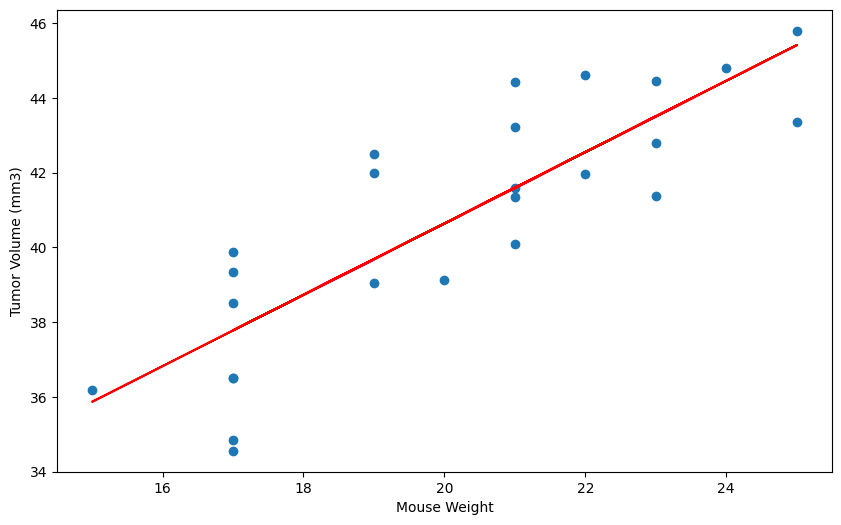

In [22]:
from scipy.stats import linregress

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouseWeight = capomulinData["Weight (g)"]
tumorVolume = capomulinData["avgTumorVol"]

correlation =  st.pearsonr(mouseWeight, tumorVolume)
print(f"The correlation between Mouse Weight and Tumor Volume is: {round(correlation[0], 2)}")

x_values = mouseWeight
y_values = tumorVolume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (10, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
